# Predicting Car Prices

In this project we will use the k-nearest neighbors machine learning algorithm to predict a car's market price using its attributes. The data set we will be working with contains information on various cars.

Specifically, we have the technical aspects of the each vehicle, like the miles per gallon, the acceleration and the weight of each car.

The dataset we will be using can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile).



In [52]:
import pandas as pd
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv('imports-85.data',names=cols)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

There are several columns with numerical values that can be used as features, while the 'price' columns will be the target columns for the knn machine learning algorithm. We will select these numerical columns from the complete dataset for our subsequent analysis.

In [53]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

Next we will replace any '?' values with np.nan values that we can drop prio to the machine learning algorithm. We will also have to update the rest of the values to a numeric type

In [54]:
import numpy as np
numeric_cars=numeric_cars.replace('?',np.nan)
numeric_cars=numeric_cars.astype(float,inplace=True)

In [55]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


We will drop the columns with missing price, since price is the value we want to predict with our model.

In [56]:
numeric_cars=numeric_cars.dropna(subset=['price'])
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression-rate     201 non-null float64
horsepower           199 non-null float64
peak-rpm             199 non-null float64
city-mpg             201 non-null float64
highway-mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB


For the rest of the columns, we will fill each nan value with the columns mean. Finally we will normalize all columns except the target column with values between 0 and 1.


In [57]:
numeric_cars=numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [58]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

Next step will be to create a univariate k-nearest neighbors model


In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

#Testing the univariate knn algorithm on various columns:
results={}
for train_col in numeric_cars.columns.drop('price'):
    rmse = knn_train_test(train_col,'price',numeric_cars)
    results[train_col]=rmse


In [60]:
results

{'bore': 6780.627784685976,
 'city-mpg': 4766.422505090134,
 'compression-rate': 6610.812153159129,
 'curb-weight': 4401.118254793124,
 'height': 8144.441042663747,
 'highway-mpg': 4630.026798588056,
 'horsepower': 4037.0377131537603,
 'length': 5427.2009608367125,
 'normalized-losses': 7330.197653434445,
 'peak-rpm': 7697.4596964334805,
 'stroke': 8006.529544647101,
 'wheel-base': 5461.553997873057,
 'width': 4704.482589704386}

The results for the default k=5 value of the knn algorithm indicate that the horsepower column has the min rmse. We will modify the function above to take different k values as a parameter

In [61]:
def knn_train_test(train_col, target_col, df,k):
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [40]:
k_values=[1,3,5,7,9]

k_rmse_results={}
for train_col in numeric_cars.columns.drop('price'):
    k_rmses={}
    for k in k_values:
        rmse = knn_train_test(train_col,'price',numeric_cars,k)
        results[train_col]=rmse
        k_rmses[k]=rmse
    k_rmse_results[train_col]=k_rmses
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

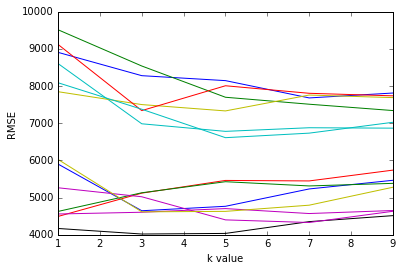

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

best_features={}
for k,v in k_rmse_results.items():

    x=[]
    y=[]
    for key in sorted(v):
        x.append(key)
        y.append(k_rmse_results[k][key])
    best_features[k]=np.mean(y)
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


## Multivariate Model
We will now modify the knn function we created above so that it can contain multiple columns and we will train and test based on the best univariate models from above 


In [100]:
def knn_train_test(train_cols, target_col, df,k):
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_cols], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_cols])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

best_features_series = pd.Series(best_features)
best_features_series.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [101]:
best_2 = knn_train_test(['horsepower','width'],'price',numeric_cars,5)
print(best_2)
best_3=knn_train_test(['horsepower','width','curb-weight'],'price',numeric_cars,5)
print(best_3)
best_4=knn_train_test(['horsepower','width','curb-weight','highway-mpg'],'price',numeric_cars,5)
print(best_4)
best_5=knn_train_test(['horsepower','width','curb-weight','highway-mpg','length'],'price',numeric_cars,5)
print(best_5)

3589.3132622073304
3305.9401397969677
3358.6915801682458
3665.546673045813


Finally, for the best performing model from above (for three features), we will optimize the model with hyperparameters from 1 to 25

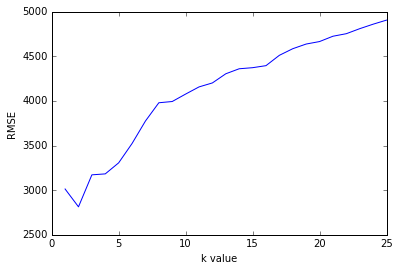

In [118]:
best_three_rmses={}
for k in range(1,26):
    best_3 = knn_train_test(['horsepower','width','curb-weight'],'price',numeric_cars,k)
    best_three_rmses[k]=best_3


plt.plot(list(best_three_rmses.keys()),list(best_three_rmses.values()))
plt.xlabel('k value')
plt.ylabel('RMSE')   
    

# Conclusions

From the various models we tested to predict the car prices, we can see that the three-feature model for k=2 yields the least RMSE.

We could try k-fold validation instead of train-test validation with various features to confirm the results
